In [12]:
# 1) установить gdown (разово)
!pip install -q -U gdown

In [13]:
# 2) скачать всю папку в /content/drive_folder
FOLDER_URL="https://drive.google.com/drive/folders/1B8oObPiWMzbnvihodze71Vjv-N4nbpxU"
!gdown --folder $FOLDER_URL -O /content/drive_folder
!ls -la /content/drive_folder

Retrieving folder contents
Processing file 1T6QuFUReIV9w960v63msOIlqZiW0Gn9- fpr.png
Processing file 1ODCY8w6dJFmxVap6Ty2oYfCbXZsxkqPH rocauc.png
Processing file 10XYwnIpwEf6JTS8_9QfrN9iLzvsTT72- SHIFT_ML_2025_COMPETITION.zip
Processing file 1jejmAa5GW_elzFg2JvXFwsWJc2hDQnxH tpr.png
Processing file 1Ej7oMNl5Gc5S0dKhHmeF_IY-zsFUoTMq ответ.png
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1T6QuFUReIV9w960v63msOIlqZiW0Gn9-
To: /content/drive_folder/fpr.png
100% 4.11k/4.11k [00:00<00:00, 15.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ODCY8w6dJFmxVap6Ty2oYfCbXZsxkqPH
To: /content/drive_folder/rocauc.png
100% 45.0k/45.0k [00:00<00:00, 132MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=10XYwnIpwEf6JTS8_9QfrN9iLzvsTT72-
From (redirected): https://drive.google.com/uc?id=10XYwnIpwEf6JTS8_9QfrN9iLzvsTT72-&confirm=t&uuid=b29a6378-ace7-4733-a074-fd9de5d

In [14]:
!unzip -o /content/drive_folder/SHIFT_ML_2025_COMPETITION.zip -d /content/drive_folder/SHIFT_ML_2025_COMPETITION


Archive:  /content/drive_folder/SHIFT_ML_2025_COMPETITION.zip
  inflating: /content/drive_folder/SHIFT_ML_2025_COMPETITION/baseline.ipynb  
  inflating: /content/drive_folder/SHIFT_ML_2025_COMPETITION/__MACOSX/._baseline.ipynb  
  inflating: /content/drive_folder/SHIFT_ML_2025_COMPETITION/shift_ml_2025_test.csv  
  inflating: /content/drive_folder/SHIFT_ML_2025_COMPETITION/__MACOSX/._shift_ml_2025_test.csv  
  inflating: /content/drive_folder/SHIFT_ML_2025_COMPETITION/shift_ml_2025_train.csv  
  inflating: /content/drive_folder/SHIFT_ML_2025_COMPETITION/__MACOSX/._shift_ml_2025_train.csv  


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

train = pd.read_csv('/content/drive_folder/SHIFT_ML_2025_COMPETITION/shift_ml_2025_train.csv',low_memory=False) #
target = train['итоговый_статус_займа']
test = pd.read_csv('/content/drive_folder/SHIFT_ML_2025_COMPETITION/shift_ml_2025_test.csv',low_memory=False) #/content/drive_folder/SHIFT_ML_2025_COMPETITION/shift_ml_2025_test.csv

# Выбираем только нужные признаки
features = ['сумма_займа', 'лимит_по_картам']
X_train = train[features]
X_train = X_train.fillna(0)

y_train = target
X_test = test[features]
X_test = X_test.fillna(0)

# Обучаем логистическую регрессию
model = LogisticRegression()
model.fit(X_train, y_train)

# Делаем предсказания
test_predict = model.predict_proba(X_test)[:, 1]

# Формируем сабмит
answer = pd.DataFrame()
answer['id'] = test['id']
answer['proba'] = test_predict
answer.to_csv('submission.csv', index=False)

In [26]:
df = pd.read_csv("/content/drive_folder/SHIFT_ML_2025_COMPETITION/shift_ml_2025_train.csv")

/tmp/ipython-input-3501627072.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive_folder/SHIFT_ML_2025_COMPETITION/shift_ml_2025_train.csv")


In [20]:
ann_incme = pd.read_csv("/content/drive_folder/SHIFT_ML_2025_COMPETITION/shift_ml_2025_train.csv", usecols=["годовой_доход"])

In [21]:
q25 = ann_incme["годовой_доход"].quantile(0.25)
print("25%-квантиль годового дохода:", q25)

25%-квантиль годового дохода: 915200.0


In [27]:
print(df.columns.tolist())

['id', 'сумма_займа', 'срок_займа', 'процентная_ставка', 'аннуитет', 'рейтинг', 'допрейтинг', 'профессия_заемщика', 'стаж', 'владение_жильем', 'годовой_доход', 'подтвержден_ли_доход', 'итоговый_статус_займа', 'рейтинг_OCR', 'платежный_график', 'коэфф_акционных_зачислений_в_остатке', 'цель_займа', 'кол_во_субсидий_за_год', 'индекс_проживания', 'регион', 'пдн', 'пос_стоп_фактор', 'юридический_статус', 'кол-во_просрочек_за_два_года', 'коэфф_невыплаченного_сумм_остатка', 'коэфф_исходного_платежа', 'дата_первого_займа', 'нижний_порог_рейтинга_заемщика', 'верхний_порог_рейтинга_заемщика', 'кол-во_заявок_за_полгода', 'кол-во_месяцев_с_последней_просрочки', 'кол-во_месяцев_с_последнего_займа', 'кол-во_открытых_счетов', 'кол-во_записей_в_общедоступных_документах', 'оборотный_баланс', 'коэфф_загрузки_возобновляемого_счета', 'кол-во_счетов', 'первоначальный_статус_займа', 'непогашенная_сумма_из_тела_займов', 'сумма_выплат_по_просрочкам', 'пени_за_дефолт', 'дата_следующей_выплаты', 'грейд_на_детер

In [29]:
print(df[['рейтинг', 'итоговый_статус_займа']])

        рейтинг  итоговый_статус_займа
0             В                      0
1             Б                      0
2             В                      0
3             Б                      0
4             Б                      0
...         ...                    ...
1210774       Б                      0
1210775       В                      0
1210776       В                      1
1210777       В                      0
1210778       В                      1

[1210779 rows x 2 columns]


In [28]:
df.groupby('рейтинг')['итоговый_статус_займа'].mean()

,итоговый_статус_займа
рейтинг,
А,0.060594
Б,0.133952
В,0.224474
Г,0.303468
Д,0.384352
Е,0.452222
Ж,0.497314


In [31]:
mean_loan = df[(df['профессия_заемщика'] == 'инженер') & (df['рейтинг'] == 'Б')]['сумма_займа'].mean()
print("Средняя сумма займа инженеров с рейтингом 'Б':", mean_loan)

Средняя сумма займа инженеров с рейтингом 'Б': 772842.0256991686


In [32]:
features = [
    'кол-во_карт_без_нарушений',
    'совокупный_статус_подтверждения_доходов_заемщиков',
    'совокупный_доход_заемщиков',
    'дата_следующей_выплаты'
]

missing_counts = df[features].isnull().sum()
print(missing_counts)

кол-во_карт_без_нарушений                              50207
совокупный_статус_подтверждения_доходов_заемщиков    1187729
совокупный_доход_заемщиков                           1187546
дата_следующей_выплаты                               1210779
dtype: int64


In [33]:
print(df['тип_предоставления_кредита'].unique())

['Наличные' 'Перевод']


In [35]:
from scipy.stats import ttest_ind

df_rating_zh = df[df['рейтинг'] == 'Ж']
group_paid = df_rating_zh[df_rating_zh['итоговый_статус_займа'] == 0]['сумма_займа']
group_not_paid = df_rating_zh[df_rating_zh['итоговый_статус_займа'] == 1]['сумма_займа']
print(f"группы выплативших: {len(group_paid)}")
print(f"группы не выплативших: {len(group_not_paid)}")

t_stat, p_value = ttest_ind(group_paid, group_not_paid, equal_var=False)
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")


группы выплативших: 4118
группы не выплативших: 4074
t-statistic = 0.9739
p-value = 0.3301
Не отвергаем нулевую гипотезу


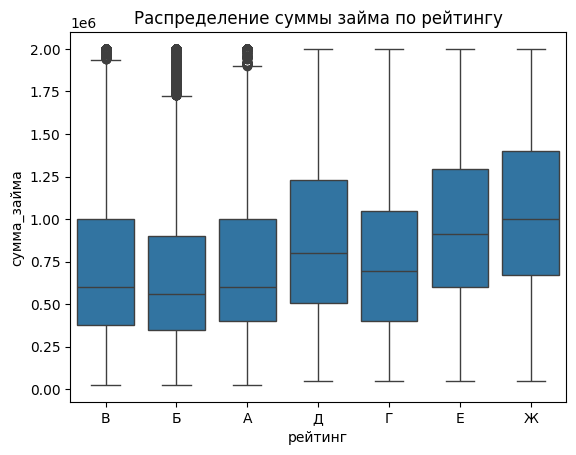

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='рейтинг', y='сумма_займа', data=df)
plt.title('Распределение суммы займа по рейтингу')
plt.show()